In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv('cookies_train.csv')
data.head()

,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini,class
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Cookies
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies


In [3]:
data_test= pd.read_csv('cookies_test.csv')
data_test.head()

,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Cookies
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Cookies


In [4]:
print(data_test.iloc[:, :-1].shape)
print(data_test.iloc[:, -1].unique())
print('Broj recepata za kolacice je: ',np.sum(data_test.iloc[:, -1]=='Cookies'))
print('Broj recepata za peciva je: ',np.sum(data_test.iloc[:, -1]=='Pastries'))
print('Broj recepata za pizu je: ',np.sum(data_test.iloc[:, -1]=='Pizzas'))

(193, 133)
['Cookies' 'Pastries' 'Pizzas']
Broj recepata za kolacice je:  80
Broj recepata za peciva je:  69
Broj recepata za pizu je:  44


In [5]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]
print(X.shape)
print(y.unique())

(1738, 133)
['Cookies' 'Pastries' 'Pizzas']


In [6]:
x=X.isnull().sum().sum()
print(x)
x1=data_test.isnull().sum().sum()
print(x1)

0
0


In [7]:
print('Broj recepata za kolacice je: ',np.sum(y=='Cookies'))
print('Broj recepata za peciva je: ',np.sum(y=='Pastries'))
print('Broj recepata za pizu je: ',np.sum(y=='Pizzas'))

Broj recepata za kolacice je:  723
Broj recepata za peciva je:  619
Broj recepata za pizu je:  396


In [8]:
#histogrami

Text(0.5, 1.0, 'pica')

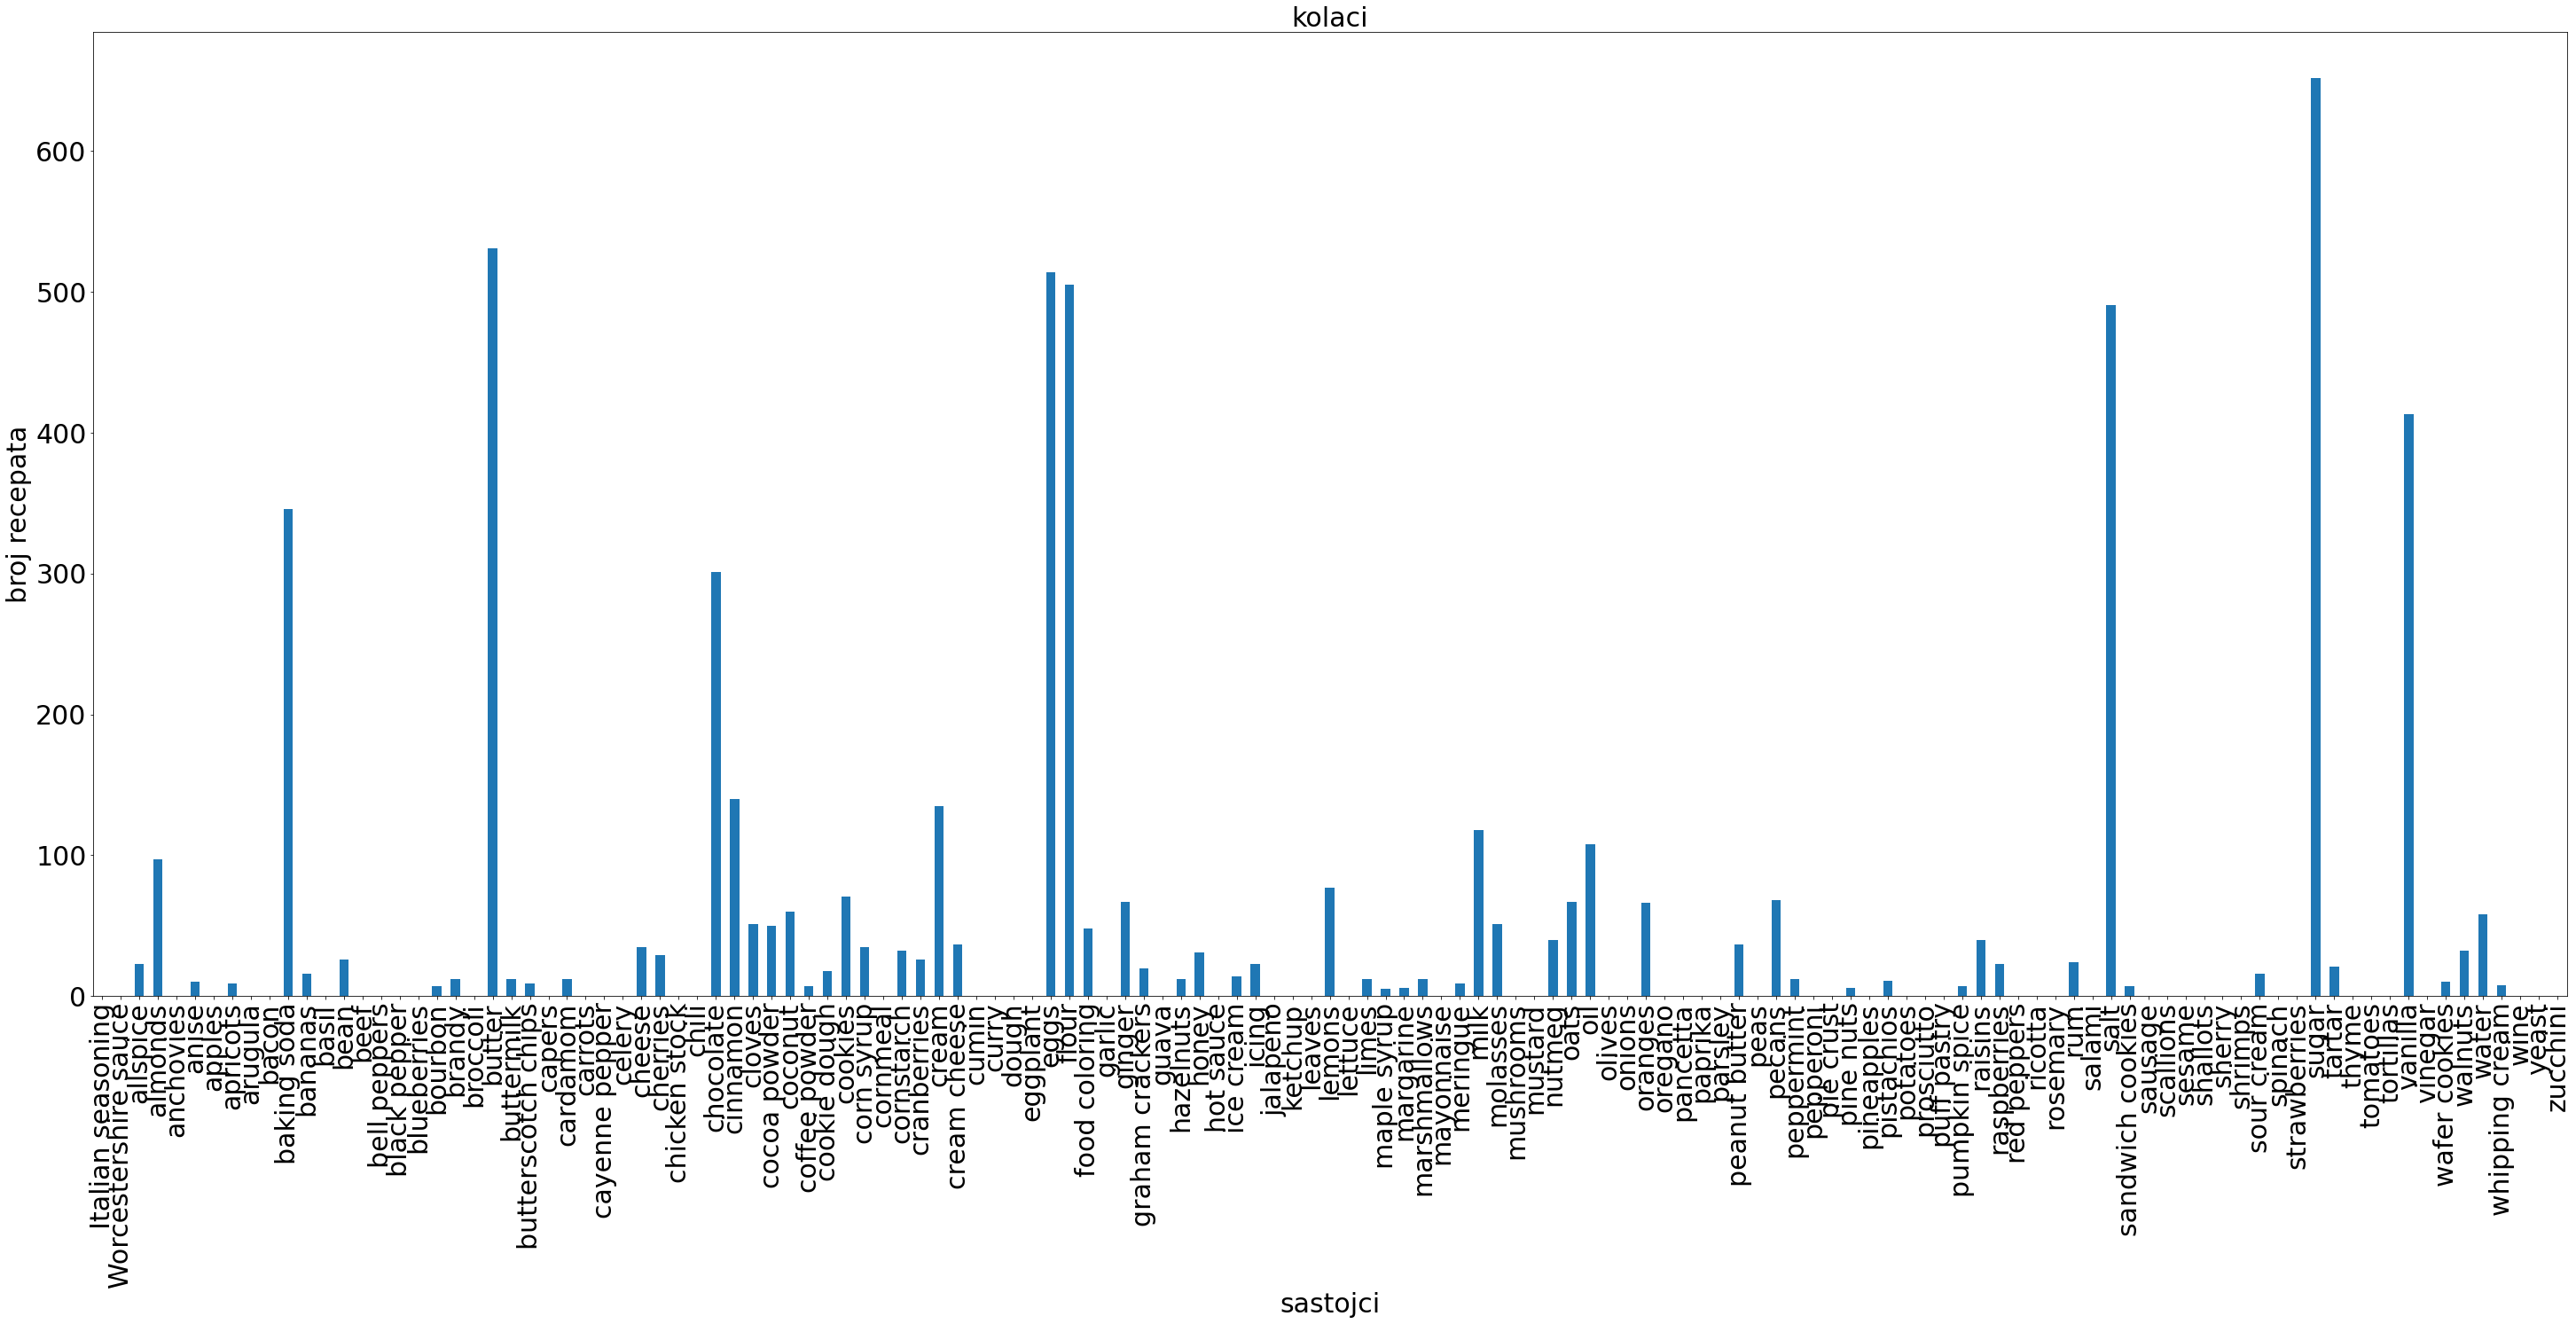

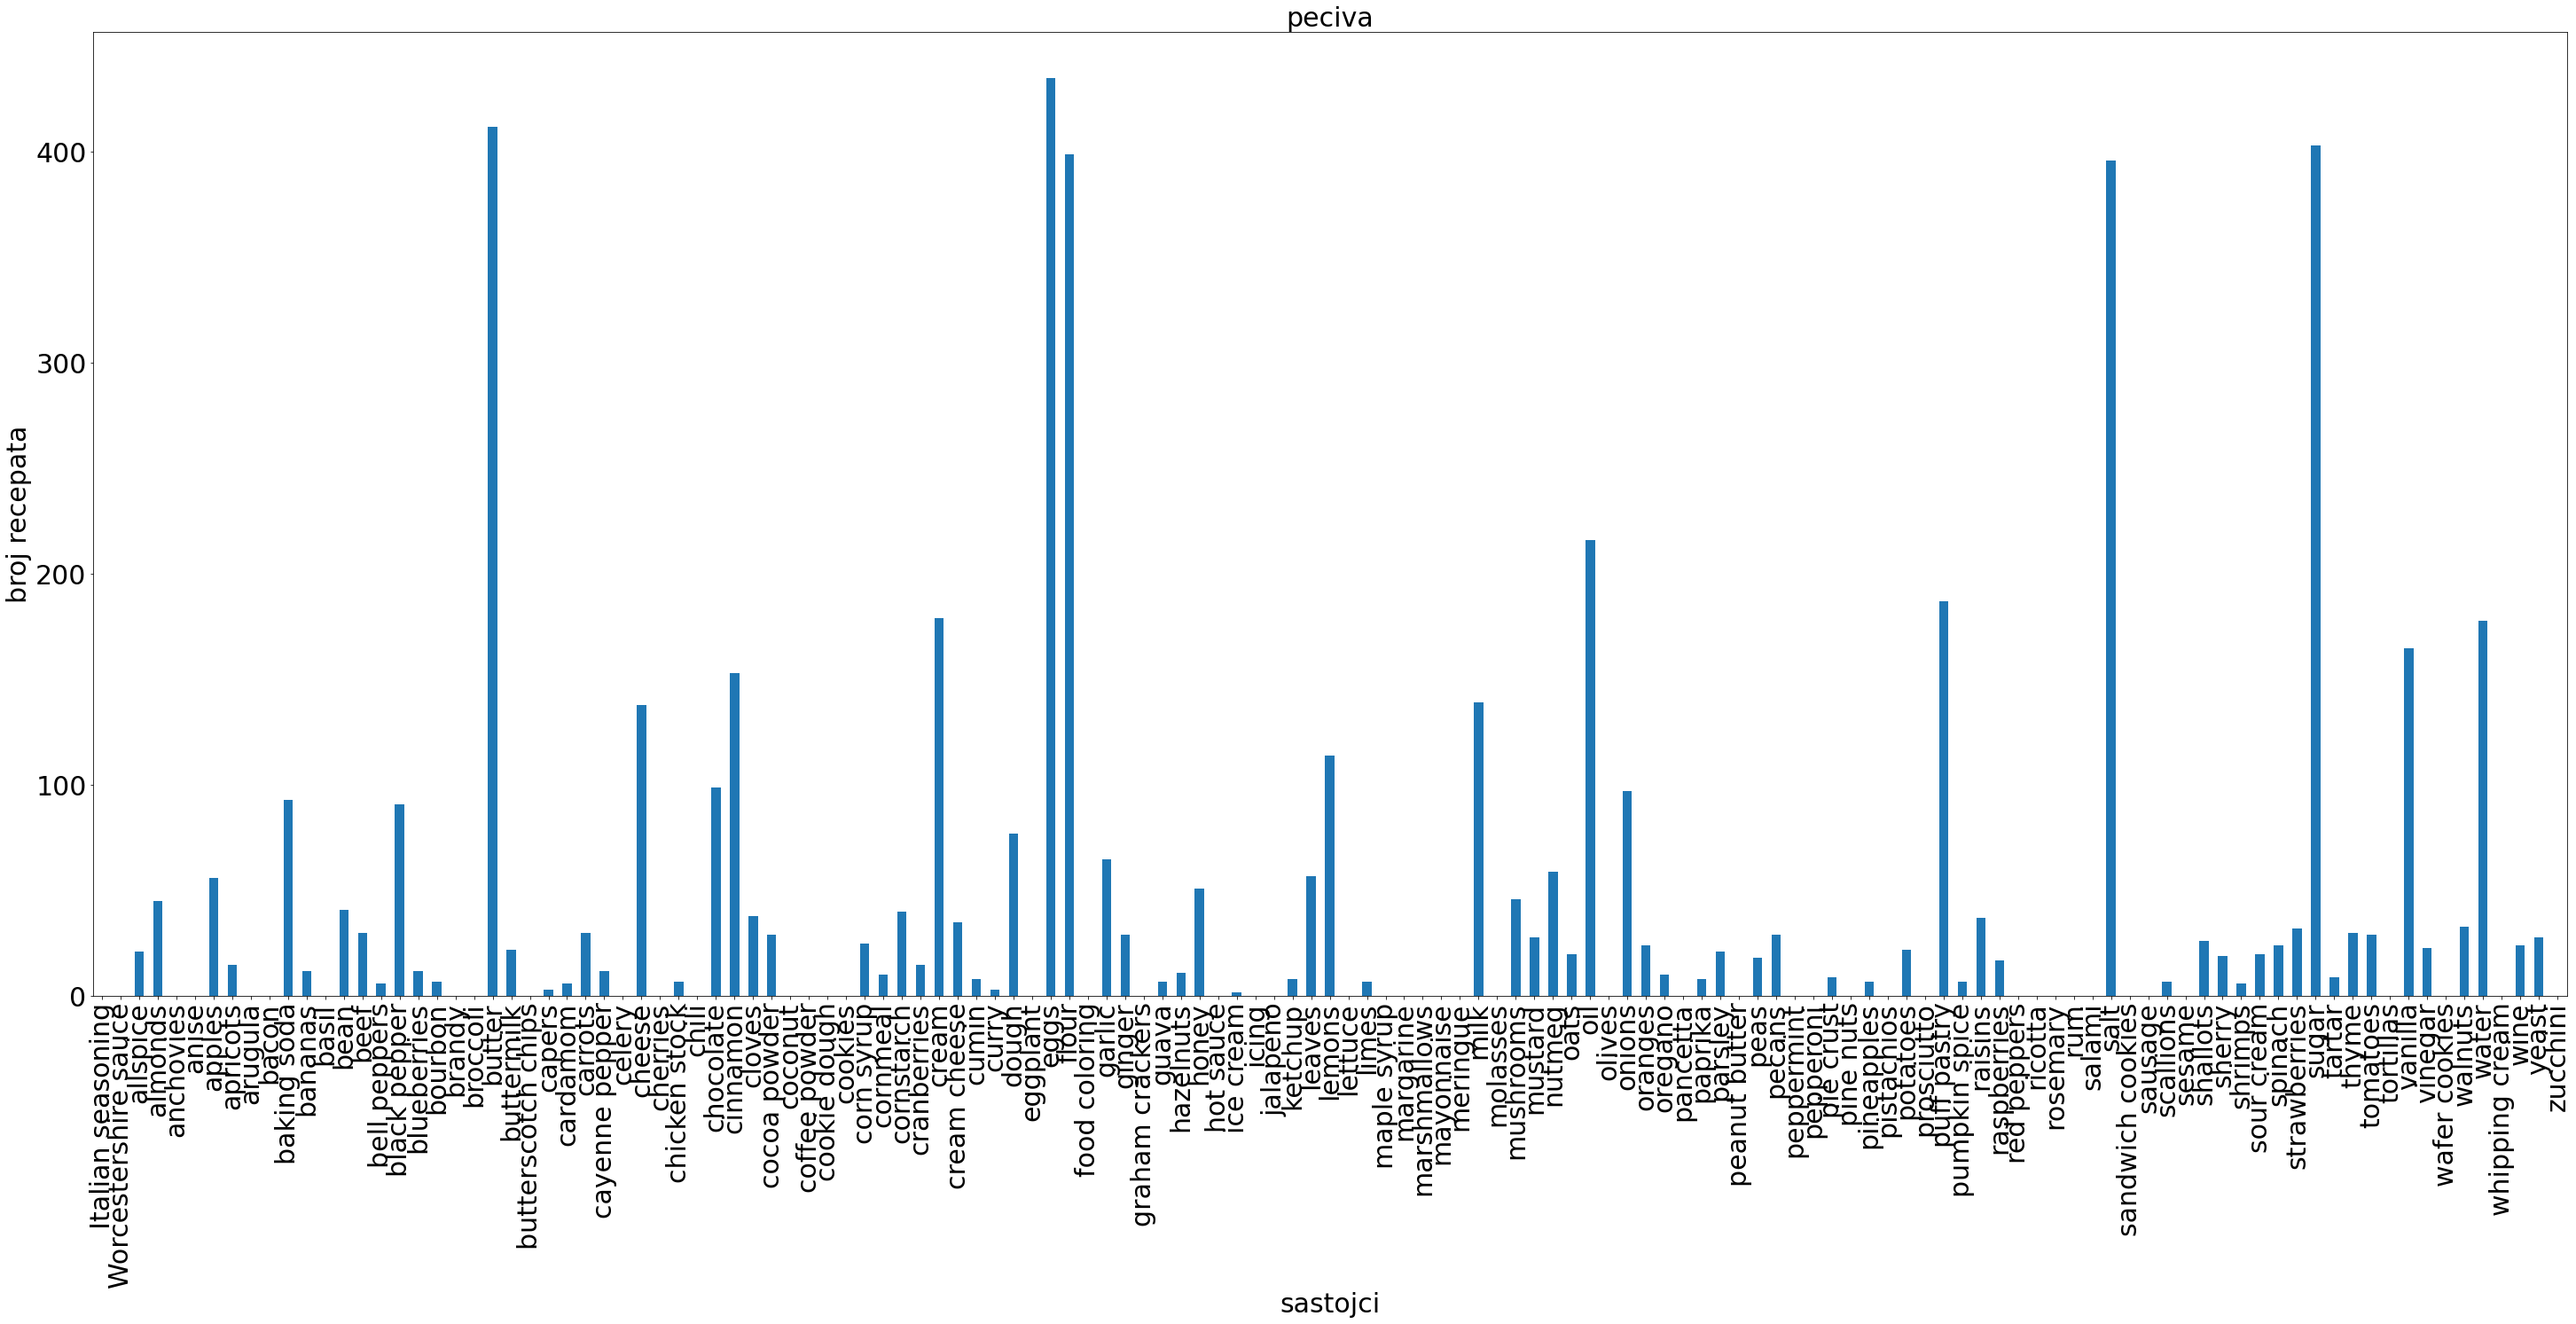

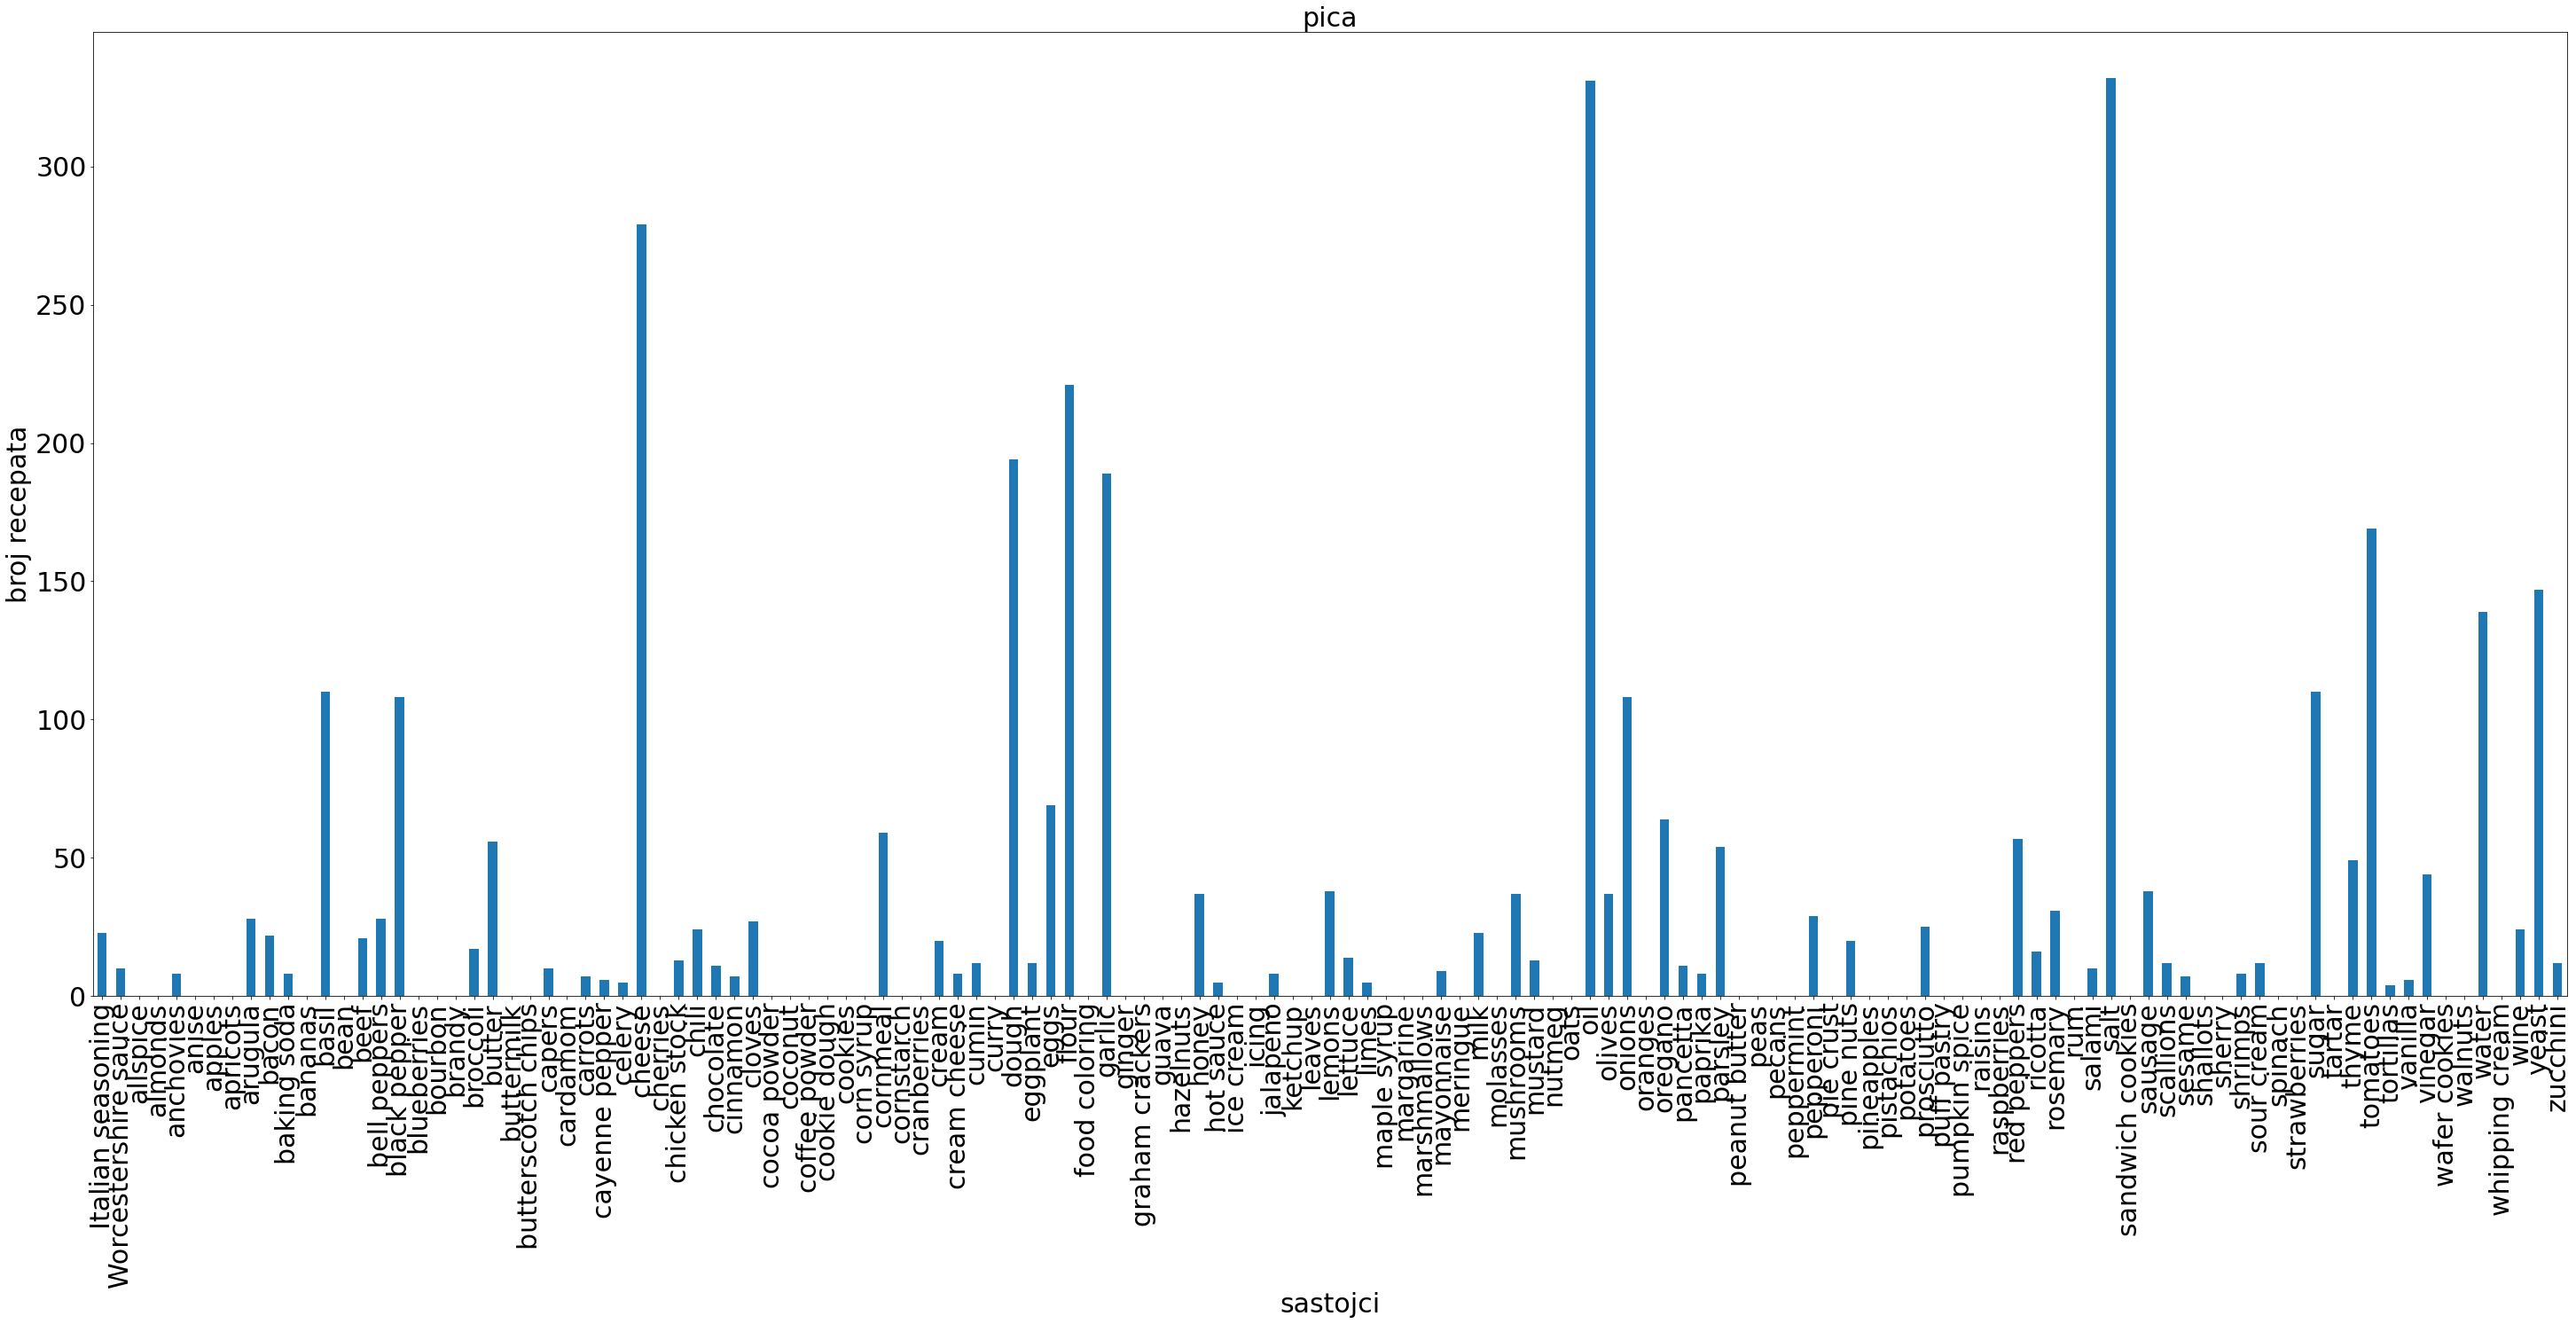

In [9]:
gb=data.groupby('class').sum()

kolaci=gb.loc['Cookies']
plt.figure(figsize=(50,20))
kolaci.plot(kind='bar', fontsize = 30)
plt.xlabel('sastojci', fontsize = 30)
plt.ylabel('broj recepata', fontsize = 30)
plt.title('kolaci', fontsize = 30)

peciva=gb.loc['Pastries']
plt.figure(figsize=(50,20))
peciva.plot(kind='bar', fontsize = 30)
plt.xlabel('sastojci',fontsize = 30)
plt.ylabel('broj recepata', fontsize = 30)
plt.title('peciva', fontsize = 30)

pica=gb.loc['Pizzas']
plt.figure(figsize=(50,20))
pica.plot(kind='bar', fontsize = 30)
plt.xlabel('sastojci', fontsize = 30)
plt.ylabel('broj recepata', fontsize = 30)
plt.title('pica', fontsize = 30 )

In [10]:
#kNN

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(X, y)
acc = []
for k in [1, 5, 10]:
    for m in ['jaccard', 'dice','matching', 'kulsinski','rogerstanimoto','russellrao','sokalmichener','sokalsneath']:
        indexes = kf.split(X, y)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
            y_pred = classifier.predict(X.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
        print('za parametre k=', k, ' i m=', m, ' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        print(fin_conf_mat)
        acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


za parametre k= 1  i m= jaccard  tacnost je:  0.9016211547405488  a mat. konf. je:
[[664.  56.   3.]
 [ 59. 543.  17.]
 [ 10.  26. 360.]]
za parametre k= 1  i m= dice  tacnost je:  0.9016211547405488  a mat. konf. je:
[[664.  56.   3.]
 [ 59. 543.  17.]
 [ 10.  26. 360.]]
za parametre k= 1  i m= matching  tacnost je:  0.8929871769317653  a mat. konf. je:
[[681.  40.   2.]
 [ 84. 523.  12.]
 [ 17.  31. 348.]]
za parametre k= 1  i m= kulsinski  tacnost je:  0.9096604876752374  a mat. konf. je:
[[664.  56.   3.]
 [ 54. 545.  20.]
 [  6.  18. 372.]]
za parametre k= 1  i m= rogerstanimoto  tacnost je:  0.8929871769317653  a mat. konf. je:
[[681.  40.   2.]
 [ 84. 523.  12.]
 [ 17.  31. 348.]]
za parametre k= 1  i m= russellrao  tacnost je:  0.8653577835359776  a mat. konf. je:
[[698.  25.   0.]
 [129. 478.  12.]
 [ 14.  54. 328.]]
za parametre k= 1  i m= sokalmichener  tacnost je:  0.8929871769317653  a mat. konf. je:
[[681.  40.   2.]
 [ 84. 523.  12.]
 [ 17.  31. 348.]]
za parametre k= 1 

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True)
indexes = kf.split(X, y)
fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
for train_index, test_index in indexes:
    classifier = KNeighborsClassifier(n_neighbors=1, metric='kulsinski')
    classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index,:])
    conf_mat = confusion_matrix(y.iloc[test_index], y_pred)
    print(conf_mat)
    fin_conf_mat += conf_mat
print('finalna matrica je: ')
print(fin_conf_mat)
tacnost=accuracy_score(y.iloc[test_index], y_pred)
print('udeo ispravno predvidjenih uzoraka: ')
print(tacnost)

[[68  5  0]
 [12 47  3]
 [ 0  2 37]]
[[68  5  0]
 [ 5 56  1]
 [ 2  2 35]]
[[66  7  0]
 [ 9 50  2]
 [ 1  3 36]]
[[69  3  0]
 [ 6 50  6]
 [ 1  1 38]]
[[69  2  1]
 [ 4 57  1]
 [ 0  1 39]]
[[65  7  0]
 [ 1 56  5]
 [ 0  0 40]]
[[66  5  1]
 [ 3 59  0]
 [ 1  2 37]]
[[62 10  0]
 [ 4 57  1]
 [ 0  0 40]]
[[62  9  1]
 [ 7 54  1]
 [ 1  2 36]]
[[66  6  0]
 [ 5 55  2]
 [ 0  2 37]]
finalna matrica je: 
[[661.  59.   3.]
 [ 56. 541.  22.]
 [  6.  15. 375.]]
udeo ispravno predvidjenih uzoraka: 
0.9132947976878613


In [13]:
TP_kolaci = fin_conf_mat[0,0]
TN_kolaci  = fin_conf_mat[1,1] + fin_conf_mat[1,2] + fin_conf_mat[2, 1] + fin_conf_mat[2,2]
FP_kolaci  = fin_conf_mat[1,0] + fin_conf_mat[2,0]
FN_kolaci  = fin_conf_mat[0,1] + fin_conf_mat[0,2]
tacnost_za_kolace=(TP_kolaci+TN_kolaci)/(TP_kolaci+TN_kolaci+FP_kolaci+FN_kolaci)
print('tacnost za klasu kolaca iznosi:',tacnost_za_kolace)
TP_peciva = fin_conf_mat[1,1]
TN_peciva = fin_conf_mat[0,0] + fin_conf_mat[2,0] + fin_conf_mat[0,2] + fin_conf_mat[2,2]
FP_peciva = fin_conf_mat[0,1] + fin_conf_mat[2,1]
FN_peciva = fin_conf_mat[1,0] + fin_conf_mat[1,2]
tacnost_za_peciva=(TP_peciva+TN_peciva)/(TP_peciva+TN_peciva+FP_peciva+FN_peciva)
print('tacnost za klasu peciva iznosi:',tacnost_za_peciva)
TP_pica = fin_conf_mat[2,2]
TN_pica = fin_conf_mat[0,0] + fin_conf_mat[0,1] + fin_conf_mat[1, 0] + fin_conf_mat[1,1]
FP_pica = fin_conf_mat[0,2] + fin_conf_mat[1,2]
FN_pica = fin_conf_mat[2,0] + fin_conf_mat[2,1]
tacnost_za_pica=(TP_pica+TN_pica)/(TP_pica+TN_pica+FP_pica+FN_pica)
print('tacnost za klasu pica iznosi:',tacnost_za_pica)

tacnost za klasu kolaca iznosi: 0.9286536248561565
tacnost za klasu peciva iznosi: 0.9125431530494822
tacnost za klasu pica iznosi: 0.9735327963176065


In [14]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='kulsinski')
classifier.fit(X,y)
y_pred = classifier.predict(data_test.iloc[:,:-1]) 
conf_mat = confusion_matrix(data_test.iloc[:,-1], y_pred)
print('matrica konfuzije:')
print(conf_mat)
print('procenat pogodjenih uzoraka: ', accuracy_score(data_test.iloc[:,-1], y_pred))

matrica konfuzije:
[[77  3  0]
 [ 5 63  1]
 [ 1  3 40]]
procenat pogodjenih uzoraka:  0.9326424870466321


In [15]:
TP_kolaci = conf_mat[0,0]
TN_kolaci  = conf_mat[1,1] + conf_mat[1,2] + conf_mat[2, 1] + conf_mat[2,2]
FP_kolaci  = conf_mat[1,0] + conf_mat[2,0]
FN_kolaci  = conf_mat[0,1] + conf_mat[0,2]
tacnost_za_kolace=(TP_kolaci+TN_kolaci)/(TP_kolaci+TN_kolaci+FP_kolaci+FN_kolaci)
print('tacnost za klasu kolaca na test skupu iznosi:',tacnost_za_kolace)
TP_peciva = conf_mat[1,1]
TN_peciva = conf_mat[0,0] + conf_mat[2,0] + conf_mat[0,2] + conf_mat[2,2]
FP_peciva = conf_mat[0,1] + conf_mat[2,1]
FN_peciva = conf_mat[1,0] + conf_mat[1,2]
tacnost_za_peciva=(TP_peciva+TN_peciva)/(TP_peciva+TN_peciva+FP_peciva+FN_peciva)
print('tacnost za klasu peciva na test skupu iznosi:',tacnost_za_peciva)
TP_pica = conf_mat[2,2]
TN_pica = conf_mat[0,0] + conf_mat[0,1] + conf_mat[1, 0] + conf_mat[1,1]
FP_pica = conf_mat[0,2] + conf_mat[1,2]
FN_pica = conf_mat[2,0] + conf_mat[2,1]
tacnost_za_pica=(TP_pica+TN_pica)/(TP_pica+TN_pica+FP_pica+FN_pica)
print('tacnost za klasu pica na test skupu iznosi:',tacnost_za_pica)

tacnost za klasu kolaca na test skupu iznosi: 0.9533678756476683
tacnost za klasu peciva na test skupu iznosi: 0.9378238341968912
tacnost za klasu pica na test skupu iznosi: 0.9740932642487047


In [16]:
TP_kolaci = conf_mat[0,0]
TN_kolaci  = conf_mat[1,1] + conf_mat[1,2] + conf_mat[2, 1] + conf_mat[2,2]
FP_kolaci  = conf_mat[1,0] + conf_mat[2,0]
FN_kolaci  = conf_mat[0,1] + conf_mat[0,2]
odziv_za_kolace=TP_kolaci/(TP_kolaci+FN_kolaci)
specificnost_za_kolace=TN_kolaci/(TN_kolaci+FP_kolaci)
preciznost_za_kolace=TP_kolaci/(TP_kolaci+FP_kolaci)
print('odziv za klasu kolaca na test skupu iznosi:',odziv_za_kolace)
print('specificnost za klasu kolaca na test skupu iznosi:',specificnost_za_kolace)
print('preciznost za klasu kolaca na test skupu iznosi:',preciznost_za_kolace)

TP_peciva = conf_mat[1,1]
TN_peciva = conf_mat[0,0] + conf_mat[2,0] + conf_mat[0,2] + conf_mat[2,2]
FP_peciva = conf_mat[0,1] + conf_mat[2,1]
FN_peciva = conf_mat[1,0] + conf_mat[1,2]
odziv_za_peciva=TP_peciva/(TP_peciva+FN_peciva)
specificnost_za_peciva=TN_peciva/(TN_peciva+FP_peciva)
preciznost_za_peciva=TP_peciva/(TP_peciva+FP_peciva)
print('odziv za klasu peciva na test skupu iznosi:',odziv_za_peciva)
print('specificnost za klasu peciva na test skupu iznosi:',specificnost_za_peciva)
print('preciznost za klasu peciva na test skupu iznosi:',preciznost_za_peciva)

TP_pica = conf_mat[2,2]
TN_pica = conf_mat[0,0] + conf_mat[0,1] + conf_mat[1, 0] + conf_mat[1,1]
FP_pica = conf_mat[0,2] + conf_mat[1,2]
FN_pica = conf_mat[2,0] + conf_mat[2,1]
odziv_za_pica=TP_pica/(TP_pica+FN_pica)
specificnost_za_pica=TN_pica/(TN_pica+FP_pica)
preciznost_za_pica=TP_pica/(TP_pica+FP_pica)
print('odziv za klasu pica na test skupu iznosi:',odziv_za_pica)
print('specificnost za klasu pica na test skupu iznosi:',specificnost_za_pica)
print('preciznost za klasu pica na test skupu iznosi:',preciznost_za_pica)

print('procenat pogodjenih uzoraka: ', accuracy_score(data_test.iloc[:,-1], y_pred))

print('preciznost mikro: ', precision_score(data_test.iloc[:,-1], y_pred, average='micro'))
print('preciznost makro: ', precision_score(data_test.iloc[:,-1], y_pred, average='macro'))

print('f mera mikro: ', f1_score(data_test.iloc[:,-1], y_pred, average='micro'))
print('f mera makro: ', f1_score(data_test.iloc[:,-1], y_pred, average='macro'))

odziv za klasu kolaca na test skupu iznosi: 0.9625
specificnost za klasu kolaca na test skupu iznosi: 0.9469026548672567
preciznost za klasu kolaca na test skupu iznosi: 0.927710843373494
odziv za klasu peciva na test skupu iznosi: 0.9130434782608695
specificnost za klasu peciva na test skupu iznosi: 0.9516129032258065
preciznost za klasu peciva na test skupu iznosi: 0.9130434782608695
odziv za klasu pica na test skupu iznosi: 0.9090909090909091
specificnost za klasu pica na test skupu iznosi: 0.9932885906040269
preciznost za klasu pica na test skupu iznosi: 0.975609756097561
procenat pogodjenih uzoraka:  0.9326424870466321
preciznost mikro:  0.9326424870466321
preciznost makro:  0.9387880259106415
f mera mikro:  0.9326424870466321
f mera makro:  0.9330017416409081


In [17]:
#####SVM

In [18]:
from sklearn.svm import SVC
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(X, y)
acc = []
for c in [1, 10, 100]:
    for F in ['linear', 'rbf']:
        for mc in ['ovo', 'ovr']:
            indexes = kf.split(X, y)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
            for train_index, test_index in indexes:
                classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
                y_pred = classifier.predict(X.iloc[test_index,:])
                acc_tmp.append(accuracy_score(y.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
            print('za parametre C=', c, ', kernel=', F, ' i pristup ', mc, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

za parametre C= 1 , kernel= linear  i pristup  ovo  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= linear  i pristup  ovr  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= rbf  i pristup  ovo  tacnost je:  0.9102418443957211  a mat. konf. je:
[[691.  32.   0.]
 [ 90. 518.  11.]
 [  7.  16. 373.]]
za parametre C= 1 , kernel= rbf  i pristup  ovr  tacnost je:  0.9102418443957211  a mat. konf. je:
[[691.  32.   0.]
 [ 90. 518.  11.]
 [  7.  16. 373.]]
za parametre C= 10 , kernel= linear  i pristup  ovo  tacnost je:  0.912553983124045  a mat. konf. je:
[[680.  42.   1.]
 [ 75. 533.  11.]
 [  8.  15. 373.]]
za parametre C= 10 , kernel= linear  i pristup  ovr  tacnost je:  0.912553983124045  a mat. konf. je:
[[680.  42.   1.]
 [ 75. 533.  11.]
 [  8.  15. 373.]]
za parametre C= 10 , kernel= rbf  i pristup  ovo  tacnost je:  0

In [19]:
kf = StratifiedKFold(n_splits=10, shuffle=True)
indexes = kf.split(X, y)
fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
for train_index, test_index in indexes:
    classifier = SVC(C=10, kernel='rbf', decision_function_shape='ovo')
    classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index,:])
    conf_mat = confusion_matrix(y.iloc[test_index], y_pred)
    print(conf_mat)
    fin_conf_mat += conf_mat
print('finalna matrica je: ')
print(fin_conf_mat)
tacnost=accuracy_score(y.iloc[test_index], y_pred)
print('udeo ispravno predvidjenih uzoraka:')
print(tacnost)

[[69  4  0]
 [ 7 53  2]
 [ 0  0 39]]
[[69  4  0]
 [ 2 60  0]
 [ 1  1 37]]
[[69  4  0]
 [ 4 55  2]
 [ 1  0 39]]
[[69  3  0]
 [ 5 55  2]
 [ 1  3 36]]
[[70  2  0]
 [ 4 55  3]
 [ 0  2 38]]
[[68  4  0]
 [ 1 60  1]
 [ 0  1 39]]
[[64  8  0]
 [ 7 54  1]
 [ 1  3 36]]
[[65  7  0]
 [ 4 57  1]
 [ 0  2 38]]
[[66  6  0]
 [ 6 55  1]
 [ 2  0 37]]
[[66  6  0]
 [ 6 56  0]
 [ 2  0 37]]
finalna matrica je: 
[[675.  48.   0.]
 [ 46. 560.  13.]
 [  8.  12. 376.]]
udeo ispravno predvidjenih uzoraka:
0.9190751445086706


In [20]:
TP_kolaci = fin_conf_mat[0,0]
TN_kolaci  = fin_conf_mat[1,1] + fin_conf_mat[1,2] + fin_conf_mat[2, 1] + fin_conf_mat[2,2]
FP_kolaci  = fin_conf_mat[1,0] + fin_conf_mat[2,0]
FN_kolaci  = fin_conf_mat[0,1] + fin_conf_mat[0,2]
tacnost_za_kolace=(TP_kolaci+TN_kolaci)/(TP_kolaci+TN_kolaci+FP_kolaci+FN_kolaci)
print('tacnost za klasu kolaca iznosi:',tacnost_za_kolace)
TP_peciva = fin_conf_mat[1,1]
TN_peciva = fin_conf_mat[0,0] + fin_conf_mat[2,0] + fin_conf_mat[0,2] + fin_conf_mat[2,2]
FP_peciva = fin_conf_mat[0,1] + fin_conf_mat[2,1]
FN_peciva = fin_conf_mat[1,0] + fin_conf_mat[1,2]
tacnost_za_peciva=(TP_peciva+TN_peciva)/(TP_peciva+TN_peciva+FP_peciva+FN_peciva)
print('tacnost za klasu peciva iznosi:',tacnost_za_peciva)
TP_pica = fin_conf_mat[2,2]
TN_pica = fin_conf_mat[0,0] + fin_conf_mat[0,1] + fin_conf_mat[1, 0] + fin_conf_mat[1,1]
FP_pica = fin_conf_mat[0,2] + fin_conf_mat[1,2]
FN_pica = fin_conf_mat[2,0] + fin_conf_mat[2,1]
tacnost_za_pica=(TP_pica+TN_pica)/(TP_pica+TN_pica+FP_pica+FN_pica)
print('tacnost za klasu pica iznosi:',tacnost_za_pica)

tacnost za klasu kolaca iznosi: 0.9413118527042578
tacnost za klasu peciva iznosi: 0.9315304948216341
tacnost za klasu pica iznosi: 0.9810126582278481


In [21]:
classifier = SVC(C=10, kernel='rbf', decision_function_shape='ovo')
classifier.fit(X, y)
y_pred = classifier.predict(data_test.iloc[:,:-1])
conf_mat = confusion_matrix(data_test.iloc[:,-1], y_pred)
print(conf_mat)
print('procenat pogodjenih uzoraka:', accuracy_score(data_test.iloc[:,-1], y_pred))

[[78  2  0]
 [ 2 67  0]
 [ 3  0 41]]
procenat pogodjenih uzoraka: 0.9637305699481865


In [22]:
TP_kolaci = conf_mat[0,0]
TN_kolaci  = conf_mat[1,1] + conf_mat[1,2] + conf_mat[2, 1] + conf_mat[2,2]
FP_kolaci  = conf_mat[1,0] + conf_mat[2,0]
FN_kolaci  = conf_mat[0,1] + conf_mat[0,2]
tacnost_za_kolace=(TP_kolaci+TN_kolaci)/(TP_kolaci+TN_kolaci+FP_kolaci+FN_kolaci)
print('tacnost za klasu kolaca na test skupu iznosi:',tacnost_za_kolace)
TP_peciva = conf_mat[1,1]
TN_peciva = conf_mat[0,0] + conf_mat[2,0] + conf_mat[0,2] + conf_mat[2,2]
FP_peciva = conf_mat[0,1] + conf_mat[2,1]
FN_peciva = conf_mat[1,0] + conf_mat[1,2]
tacnost_za_peciva=(TP_peciva+TN_peciva)/(TP_peciva+TN_peciva+FP_peciva+FN_peciva)
print('tacnost za klasu peciva na test skupu iznosi:',tacnost_za_peciva)
TP_pica = conf_mat[2,2]
TN_pica = conf_mat[0,0] + conf_mat[0,1] + conf_mat[1, 0] + conf_mat[1,1]
FP_pica = conf_mat[0,2] + conf_mat[1,2]
FN_pica = conf_mat[2,0] + conf_mat[2,1]
tacnost_za_pica=(TP_pica+TN_pica)/(TP_pica+TN_pica+FP_pica+FN_pica)
print('tacnost za klasu pica na test skupu iznosi:',tacnost_za_pica)

tacnost za klasu kolaca na test skupu iznosi: 0.9637305699481865
tacnost za klasu peciva na test skupu iznosi: 0.9792746113989638
tacnost za klasu pica na test skupu iznosi: 0.9844559585492227


In [23]:
TP_kolaci = conf_mat[0,0]
TN_kolaci  = conf_mat[1,1] + conf_mat[1,2] + conf_mat[2, 1] + conf_mat[2,2]
FP_kolaci  = conf_mat[1,0] + conf_mat[2,0]
FN_kolaci  = conf_mat[0,1] + conf_mat[0,2]
odziv_za_kolace=TP_kolaci/(TP_kolaci+FN_kolaci)
specificnost_za_kolace=TN_kolaci/(TN_kolaci+FP_kolaci)
preciznost_za_kolace=TP_kolaci/(TP_kolaci+FP_kolaci)
print('odziv za klasu kolaca na test skupu iznosi:',odziv_za_kolace)
print('specificnost za klasu kolaca na test skupu iznosi:',specificnost_za_kolace)
print('preciznost za klasu kolaca na test skupu iznosi:',preciznost_za_kolace)

TP_peciva = conf_mat[1,1]
TN_peciva = conf_mat[0,0] + conf_mat[2,0] + conf_mat[0,2] + conf_mat[2,2]
FP_peciva = conf_mat[0,1] + conf_mat[2,1]
FN_peciva = conf_mat[1,0] + conf_mat[1,2]
odziv_za_peciva=TP_peciva/(TP_peciva+FN_peciva)
specificnost_za_peciva=TN_peciva/(TN_peciva+FP_peciva)
preciznost_za_peciva=TP_peciva/(TP_peciva+FP_peciva)
print('odziv za klasu peciva na test skupu iznosi:',odziv_za_peciva)
print('specificnost za klasu peciva na test skupu iznosi:',specificnost_za_peciva)
print('preciznost za klasu peciva na test skupu iznosi:',preciznost_za_peciva)

TP_pica = conf_mat[2,2]
TN_pica = conf_mat[0,0] + conf_mat[0,1] + conf_mat[1, 0] + conf_mat[1,1]
FP_pica = conf_mat[0,2] + conf_mat[1,2]
FN_pica = conf_mat[2,0] + conf_mat[2,1]
odziv_za_pica=TP_pica/(TP_pica+FN_pica)
specificnost_za_pica=TN_pica/(TN_pica+FP_pica)
preciznost_za_pica=TP_pica/(TP_pica+FP_pica)
print('odziv za klasu pica na test skupu iznosi:',odziv_za_pica)
print('specificnost za klasu pica na test skupu iznosi:',specificnost_za_pica)
print('preciznost za klasu pica na test skupu iznosi:',preciznost_za_pica)

print('procenat pogodjenih uzoraka: ', accuracy_score(data_test.iloc[:,-1], y_pred))

print('preciznost mikro: ', precision_score(data_test.iloc[:,-1], y_pred, average='micro'))
print('preciznost makro: ', precision_score(data_test.iloc[:,-1], y_pred, average='macro'))

print('f mera mikro: ', f1_score(data_test.iloc[:,-1], y_pred, average='micro'))
print('f mera makro: ', f1_score(data_test.iloc[:,-1], y_pred, average='macro'))

odziv za klasu kolaca na test skupu iznosi: 0.975
specificnost za klasu kolaca na test skupu iznosi: 0.9557522123893806
preciznost za klasu kolaca na test skupu iznosi: 0.9397590361445783
odziv za klasu peciva na test skupu iznosi: 0.9710144927536232
specificnost za klasu peciva na test skupu iznosi: 0.9838709677419355
preciznost za klasu peciva na test skupu iznosi: 0.9710144927536232
odziv za klasu pica na test skupu iznosi: 0.9318181818181818
specificnost za klasu pica na test skupu iznosi: 1.0
preciznost za klasu pica na test skupu iznosi: 1.0
procenat pogodjenih uzoraka:  0.9637305699481865
preciznost mikro:  0.9637305699481865
preciznost makro:  0.9702578429660672
f mera mikro:  0.9637305699481865
f mera makro:  0.964258529943497
